# Titanic Spaceship Kaggle Competition 


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score


In [2]:
dataset=pd.read_csv(r"C:\Users\Admin\Downloads\train (3).csv")
dataset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [3]:
dataset.isnull().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [4]:
sampel_submission=pd.read_csv(r"C:\Users\Admin\Downloads\sample_submission (1).csv")
sampel_submission.head()

,PassengerId,Transported
0,0013_01,False
1,0018_01,False
2,0019_01,False
3,0021_01,False
4,0023_01,False


In [5]:
test=pd.read_csv(r"C:\Users\Admin\Downloads\test (2).csv")
test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
data=dataset.iloc[:,[2,3,5,6,7,10,11,13]]
data

,CryoSleep,Cabin,Age,VIP,RoomService,Spa,VRDeck,Transported
0,False,B/0/P,39.0,False,0.0,0.0,0.0,False
1,False,F/0/S,24.0,False,109.0,549.0,44.0,True
2,False,A/0/S,58.0,True,43.0,6715.0,49.0,False
3,False,A/0/S,33.0,False,0.0,3329.0,193.0,False
4,False,F/1/S,16.0,False,303.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...
8688,False,A/98/P,41.0,True,0.0,1643.0,74.0,False
8689,True,G/1499/S,18.0,False,0.0,0.0,0.0,False
8690,False,G/1500/S,26.0,False,0.0,1.0,0.0,True
8691,False,E/608/S,32.0,False,0.0,353.0,3235.0,False


In [9]:
pd.options.mode.chained_assignment=None


# Label Encoding


In [10]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
data['CryoSleep']=l1.fit_transform(data['CryoSleep'])
data['Cabin']=l1.fit_transform(data['Cabin'])
data['VIP']=l1.fit_transform(data['VIP'])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CryoSleep    8693 non-null   int32  
 1   Cabin        8693 non-null   int32  
 2   Age          8514 non-null   float64
 3   VIP          8693 non-null   int32  
 4   RoomService  8512 non-null   float64
 5   Spa          8510 non-null   float64
 6   VRDeck       8505 non-null   float64
 7   Transported  8693 non-null   bool   
dtypes: bool(1), float64(4), int32(3)
memory usage: 382.1 KB


In [12]:
#Fill the null value

In [13]:
data['CryoSleep'].fillna(data['CryoSleep'].mean(),inplace=True)


In [14]:
data['Cabin'].fillna(data['Cabin'].mean(),inplace=True)


In [15]:
data['Age'].fillna(data['Age'].mean(),inplace=True)


In [16]:
data['VIP'].fillna(data['VIP'].mean(),inplace=True)


In [17]:
data['RoomService'].fillna(data['RoomService'].mean(),inplace=True)


In [18]:
data['Spa'].fillna(data['Spa'].mean(),inplace=True)


In [19]:
data['VRDeck'].fillna(data['VRDeck'].mean(),inplace=True)


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CryoSleep    8693 non-null   int32  
 1   Cabin        8693 non-null   int32  
 2   Age          8693 non-null   float64
 3   VIP          8693 non-null   int32  
 4   RoomService  8693 non-null   float64
 5   Spa          8693 non-null   float64
 6   VRDeck       8693 non-null   float64
 7   Transported  8693 non-null   bool   
dtypes: bool(1), float64(4), int32(3)
memory usage: 382.1 KB


In [21]:
#Checking the behaviour of data


<AxesSubplot:xlabel='CryoSleep', ylabel='Density'>

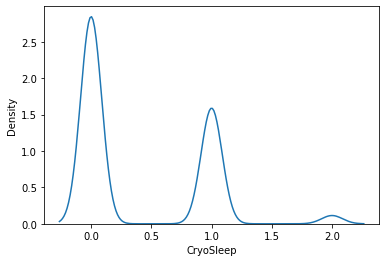

In [22]:
sns.kdeplot(data["CryoSleep"])


In [23]:
#Fill the Outliers with their mean value


In [24]:
for col in data.iloc[:,:-1].columns:
    if data.iloc[:,:-1][col].dtypes != 'object':
        q1 , q3 =data.iloc[:,:-1][col].quantile(0.25),data.iloc[:,:-1][col].quantile(0.75)
        iqr = q3 - q1
        ll = q1-1.5*iqr
        ul = q3 + 1.5*iqr
        data["Age"] = np.where(data["Age"]>ul,data["Age"].mean(),np.where(data["Age"]<ll,data["Age"].mean(),data["Age"]))  
        data["VIP"] = np.where(data["VIP"]>ul,data["VIP"].mean(),np.where(data["VIP"]<ll,data["VIP"].mean(),data["VIP"]))  
        data["RoomService"] = np.where(data["RoomService"]>ul,data["RoomService"].mean(),np.where(data["RoomService"]<ll,data["RoomService"].mean(),data["RoomService"]))
        data["Cabin"] = np.where(data["Cabin"]>ul,data["Cabin"].mean(),np.where(data["Cabin"]<ll,data["Cabin"].mean(),data["Cabin"]))  
        data["Spa"] = np.where(data["Spa"]>ul,data["Spa"].mean(),np.where(data["Spa"]<ll,data["Spa"].mean(),data["Spa"]))
        data["VRDeck"] = np.where(data["VRDeck"]>ul,data["VRDeck"].mean(),np.where(data["VRDeck"]<ll,data["VRDeck"].mean(),data["VRDeck"]))

In [25]:
#Find the Outliers Count


In [26]:
Q1=data.iloc[:,:-1].quantile(0.25)
Q3=data.iloc[:,:-1].quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier Counter of the all features")
((data.iloc[:,:-1] < (Q1 - 1.5 * IQR)) | (data.iloc[:,:-1]> (Q3 + 1.5 * IQR))).sum()


outlier Counter of the all features


CryoSleep      0
Cabin          0
Age            0
VIP            0
RoomService    0
Spa            0
VRDeck         0
dtype: int64

In [27]:
x=data.iloc[:,:-1].values
y=data.iloc[:,-1].values


In [28]:
data['Transported'].value_counts()


True     4378
False    4315
Name: Transported, dtype: int64

In [29]:
#Balancing Technique


In [30]:
#from imblearn.under_sampling import NearMiss
#nm=NearMiss()
#x_data,y_data=nm.fit_resample(x,y)

In [31]:
#from collections import Counter
#print(Counter(y_data))

In [32]:
#Standerdisation (Feature Scaling)


In [33]:
from sklearn.preprocessing import StandardScaler
ssd=StandardScaler()
x_scaled=ssd.fit_transform(x)
x_scaled

array([[-7.41735688e-01,  0.00000000e+00, -1.06581410e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.41735688e-01,  0.00000000e+00, -1.06581410e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.41735688e-01,  0.00000000e+00, -1.06581410e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       ...,
       [-7.41735688e-01,  0.00000000e+00, -1.06581410e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.41735688e-01,  0.00000000e+00, -1.06581410e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-7.41735688e-01,  0.00000000e+00, -1.06581410e-14, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=20)


# Random Forest


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)


RandomForestClassifier()

In [36]:
rfc_pred=rfc.predict(x_test)
rfc_pred

array([ True, False, False, ..., False,  True,  True])

In [37]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,rfc_pred)*100

71.93789534215065

# Decision tree


In [38]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [39]:
dt_pred=dt.predict(x_test)
dt_pred

array([ True, False, False, ..., False,  True,  True])

In [40]:
accuracy_score(y_test,dt_pred)*100


71.93789534215065

# Naive bayes


In [41]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [42]:
nb_pred=nb.predict(x_test)
nb_pred

array([ True, False, False, ..., False,  True,  True])

In [43]:
accuracy_score(y_test,nb_pred)*100


71.8803910293272

# Ensemble Technique


In [44]:
from sklearn.ensemble import VotingClassifier
vc=VotingClassifier(estimators=[("Random_Forest",rfc),("Decision_Tree",dt),("Naive_Bayes",nb)])
vc.fit(x_train,y_train)

VotingClassifier(estimators=[('Random_Forest', RandomForestClassifier()),
                             ('Decision_Tree', DecisionTreeClassifier()),
                             ('Naive_Bayes', GaussianNB())])

In [45]:
vc_pred=vc.predict(x_test)
vc_pred


array([ True, False, False, ..., False,  True,  True])

In [46]:
accuracy_score(y_test,vc_pred)*100


71.93789534215065

In [47]:
#Convert predicted values in dataframe
train_result=pd.DataFrame(np.c_[y_test,vc_pred],columns=["Actual","Transported"])
train_result

,Actual,Transported
0,True,True
1,True,False
2,False,False
3,False,False
4,True,False
...,...,...
1734,True,False
1735,False,False
1736,False,False
1737,True,True


In [48]:
train_result['Transported'].value_counts()


False    1125
True      614
Name: Transported, dtype: int64

In [49]:
data.skew()

CryoSleep      0.886635
Cabin          0.000000
Age            0.000000
VIP            0.000000
RoomService    0.000000
Spa            0.000000
VRDeck         0.000000
Transported   -0.014497
dtype: float64

In [50]:
test_data=test.iloc[:,[2,3,5,6,7,10,11]]
test_data

,CryoSleep,Cabin,Age,VIP,RoomService,Spa,VRDeck
0,True,G/3/S,27.0,False,0.0,0.0,0.0
1,False,F/4/S,19.0,False,0.0,2823.0,0.0
2,True,C/0/S,31.0,False,0.0,0.0,0.0
3,False,C/1/S,38.0,False,0.0,181.0,585.0
4,False,F/5/S,20.0,False,10.0,0.0,0.0
...,...,...,...,...,...,...,...
4272,True,G/1496/S,34.0,False,0.0,0.0,0.0
4273,False,NaN,42.0,False,0.0,10.0,144.0
4274,True,D/296/P,NaN,False,0.0,0.0,0.0
4275,False,D/297/P,NaN,False,0.0,0.0,523.0


In [51]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CryoSleep    4184 non-null   object 
 1   Cabin        4177 non-null   object 
 2   Age          4186 non-null   float64
 3   VIP          4184 non-null   object 
 4   RoomService  4195 non-null   float64
 5   Spa          4176 non-null   float64
 6   VRDeck       4197 non-null   float64
dtypes: float64(4), object(3)
memory usage: 234.0+ KB


In [52]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
test_data['CryoSleep']=l1.fit_transform(test_data['CryoSleep'])
test_data['Cabin']=l1.fit_transform(test_data['Cabin'])
test_data['VIP']=l1.fit_transform(test_data['VIP'])


In [53]:
test_data

,CryoSleep,Cabin,Age,VIP,RoomService,Spa,VRDeck
0,1,2784,27.0,0,0.0,0.0,0.0
1,0,1867,19.0,0,0.0,2823.0,0.0
2,1,257,31.0,0,0.0,0.0,0.0
3,0,259,38.0,0,0.0,181.0,585.0
4,0,1940,20.0,0,10.0,0.0,0.0
...,...,...,...,...,...,...,...
4272,1,2679,34.0,0,0.0,0.0,0.0
4273,0,3265,42.0,0,0.0,10.0,144.0
4274,1,602,NaN,0,0.0,0.0,0.0
4275,0,603,NaN,0,0.0,0.0,523.0


In [54]:
test_data['CryoSleep'].fillna(test_data['CryoSleep'].mean(),inplace=True)
test_data['Cabin'].fillna(test_data['Cabin'].mean(),inplace=True)
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)
test_data['VIP'].fillna(test_data['VIP'].mean(),inplace=True)
test_data['Spa'].fillna(test_data['Spa'].mean(),inplace=True)
test_data['VRDeck'].fillna(test_data['VRDeck'].mean(),inplace=True)
test_data['RoomService'].fillna(test_data['RoomService'].mean(),inplace=True)


In [55]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CryoSleep    4277 non-null   int32  
 1   Cabin        4277 non-null   int32  
 2   Age          4277 non-null   float64
 3   VIP          4277 non-null   int32  
 4   RoomService  4277 non-null   float64
 5   Spa          4277 non-null   float64
 6   VRDeck       4277 non-null   float64
dtypes: float64(4), int32(3)
memory usage: 183.9 KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

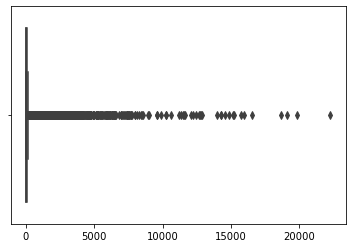

In [56]:
sns.boxplot(test_data.values)


In [57]:
#From above graph we say that outliers are present in given dataset


In [58]:
Q1=test_data.quantile(0.25)
Q3=test_data.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier Counter of the all features")
((test_data < (Q1 - 1.5 * IQR)) | (test_data> (Q3 + 1.5 * IQR))).sum()


outlier Counter of the all features


CryoSleep        0
Cabin            0
Age             75
VIP            167
RoomService    908
Spa            908
VRDeck         907
dtype: int64

In [59]:
#Now we fill the Outliers with their mean


In [60]:
for col in test_data.columns:
    if test_data[col].dtypes != 'object':
        q1 , q3 =test_data[col].quantile(0.25),test_data[col].quantile(0.75)
        iqr = q3 - q1
        ll = q1-1.5*iqr
        ul = q3 + 1.5*iqr
        test_data["Age"] = np.where(test_data["Age"]>ul,test_data["Age"].mean(),np.where(test_data["Age"]<ll,test_data["Age"].mean(),test_data["Age"]))  
        test_data["VIP"] = np.where(test_data["VIP"]>ul,test_data["VIP"].mean(),np.where(test_data["VIP"]<ll,test_data["VIP"].mean(),test_data["VIP"]))  
        test_data["RoomService"] = np.where(test_data["RoomService"]>ul,test_data["RoomService"].mean(),np.where(test_data["RoomService"]<ll,test_data["RoomService"].mean(),test_data["RoomService"]))
        test_data["Cabin"] = np.where(test_data["Cabin"]>ul,test_data["Cabin"].mean(),np.where(test_data["Cabin"]<ll,test_data["Cabin"].mean(),test_data["Cabin"]))  
        test_data["Spa"] = np.where(test_data["Spa"]>ul,test_data["Spa"].mean(),np.where(test_data["Spa"]<ll,test_data["Spa"].mean(),test_data["Spa"]))
        test_data["VRDeck"] = np.where(test_data["VRDeck"]>ul,test_data["VRDeck"].mean(),np.where(test_data["VRDeck"]<ll,test_data["VRDeck"].mean(),test_data["VRDeck"]))

In [61]:
#Now we Count the Count of Outliers


In [62]:
Q1=test_data.quantile(0.25)
Q3=test_data.quantile(0.75)
IQR=Q3-Q1
IQR
print("outlier Counter of the all features")
((test_data < (Q1 - 1.5 * IQR)) | (test_data> (Q3 + 1.5 * IQR))).sum()


outlier Counter of the all features


CryoSleep      0
Cabin          0
Age            0
VIP            0
RoomService    0
Spa            0
VRDeck         0
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

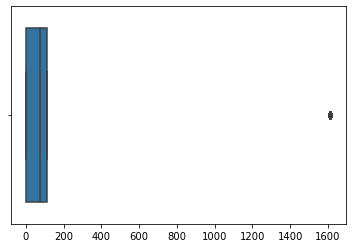

In [63]:
sns.boxplot(test_data.values)


In [64]:
from sklearn.preprocessing import StandardScaler
ssd=StandardScaler()
test_scaled=ssd.fit_transform(test_data)
test_scaled


array([[ 1.11673669e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.42108547e-14,  0.00000000e+00, -1.42108547e-14],
       [-7.58521582e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -1.42108547e-14,  0.00000000e+00, -1.42108547e-14],
       [ 1.11673669e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.42108547e-14,  0.00000000e+00, -1.42108547e-14],
       ...,
       [ 1.11673669e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.42108547e-14,  0.00000000e+00, -1.42108547e-14],
       [-7.58521582e-01,  0.00000000e+00,  0.00000000e+00, ...,
        -1.42108547e-14,  0.00000000e+00, -1.42108547e-14],
       [ 1.11673669e+00,  0.00000000e+00,  0.00000000e+00, ...,
        -1.42108547e-14,  0.00000000e+00, -1.42108547e-14]])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

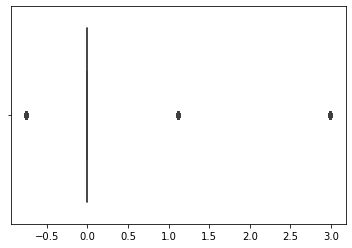

In [65]:
sns.boxplot(test_scaled)


In [66]:
vc_pred_test=vc.predict(test_scaled)
vc_pred_test


array([ True, False,  True, ...,  True, False,  True])

In [67]:
#Convert predicted values in dataframe
test_result=pd.DataFrame(np.c_[test['PassengerId'],vc_pred_test],columns=["PassengerId","Transported"])
test_result.head()


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [68]:
test_result['Transported'].unique()


array([True, False], dtype=object)

In [69]:
test_result['Transported'].value_counts()


False    2733
True     1544
Name: Transported, dtype: int64

In [70]:
test_result.to_csv("Titanic Spaceship competition Submission main.csv",index=False)


In [71]:
# dat=pd.read_csv(r"D:\MLAI\Numpy\Titanic Spaceship competition Submission.csv")
# dat.head()

In [72]:
# data=pd.read_csv(r"D:\MLAI\Numpy\Titanic Spaceship competition Submission")
# data